## Gather

In [578]:
import requests  #  all of the packages i plan to use
import os
import pandas as pd
import tweepy
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tweepy.auth import OAuthHandler


### Read `image_predictions.tsv`

In [579]:
folder_name='image_predictions'     # make folder in desk
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [580]:
# get data from web and write it in desk
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
respones=requests.get(url)
with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
    file.write(respones.content)

In [581]:
image_predictions=pd.read_csv('image-predictions.tsv',sep='\t')  # put data in Dataframe 

### Read `twitter-archive-enhanced.csv`

In [582]:
twitter_archive_enhanced=pd.read_csv('twitter-archive-enhanced.csv')


### Read `tweet-json.txt`
<h5 style="color:red;">i failed to have a devloper account in twitter,from week my Application Under Review so i download the file from udacity</h5>

In [583]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

In [584]:
tweet_ids = twitter_archive_enhanced.tweet_id.values
len(tweet_ids)


2356

In [585]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [586]:
tweet_json=pd.read_json('tweet-json.txt', lines=True)  # put data in datafram by writing line by line

In [587]:
tweet_json_temp=tweet_json[{'id','favorite_count','retweeted','retweet_count'}] # only coulmns i am interested 

## Assess

### `image_predictions`

In [588]:
image_predictions.sample(10) # visual Assessment

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1806,832369877331693569,https://pbs.twimg.com/media/C40r_GDWAAA5vNJ.jpg,1,kelpie,0.504690,True,German_short-haired_pointer,0.105208,True,Staffordshire_bullterrier,0.054338,True
1613,801958328846974976,https://pbs.twimg.com/media/CyEg2AXUsAA1Qpf.jpg,1,Staffordshire_bullterrier,0.327887,True,American_Staffordshire_terrier,0.271916,True,Labrador_retriever,0.247619,True
1580,796387464403357696,https://pbs.twimg.com/media/Cw1WKu1UQAAvWsu.jpg,1,Pekinese,0.461164,True,Pomeranian,0.288650,True,Siamese_cat,0.052423,False
1029,711008018775851008,https://pbs.twimg.com/media/Cd4CBQFW8AAY3ND.jpg,1,French_bulldog,0.731405,True,Boston_bull,0.150672,True,pug,0.021811,True
429,674265582246694913,https://pbs.twimg.com/media/CVt49k_WsAAtNYC.jpg,1,slug,0.998075,False,ice_lolly,0.000984,False,leafhopper,0.000097,False
2003,877201837425926144,https://pbs.twimg.com/media/DCxyahJWsAAddSC.jpg,1,Pembroke,0.931120,True,Cardigan,0.068698,True,basenji,0.000082,True
955,705239209544720384,https://pbs.twimg.com/media/CcmDUjFW8AAqAjc.jpg,1,Chihuahua,0.157950,True,toy_terrier,0.089920,True,Mexican_hairless,0.063225,True
97,667728196545200128,https://pbs.twimg.com/media/CUQ_QahUAAAVQjn.jpg,1,kuvasz,0.360159,True,golden_retriever,0.293744,True,Labrador_retriever,0.270673,True
1575,796031486298386433,https://pbs.twimg.com/media/CwwSaWJWIAASuoY.jpg,1,golden_retriever,0.893775,True,Labrador_retriever,0.070140,True,doormat,0.008419,False
1803,832040443403784192,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,1,miniature_pinscher,0.796313,True,Chihuahua,0.155413,True,Staffordshire_bullterrier,0.030943,True


In [589]:
image_predictions.tail(200)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1875,845677943972139009,https://pbs.twimg.com/media/C7xzmngWkAAAp9C.jpg,1,chow,0.808681,True,groenendael,0.123141,True,Newfoundland,0.022143,True
1876,845812042753855489,https://pbs.twimg.com/media/C7ztkInW0AEh1CD.jpg,1,Samoyed,0.979803,True,chow,0.015923,True,white_wolf,0.001303,False
1877,846042936437604353,https://pbs.twimg.com/media/C72_iaUVUAEhZSn.jpg,1,golden_retriever,0.961110,True,Labrador_retriever,0.016695,True,Tibetan_mastiff,0.009082,True
1878,846153765933735936,https://pbs.twimg.com/media/C74kWqoU8AEaf3v.jpg,1,giant_schnauzer,0.346468,True,flat-coated_retriever,0.218451,True,Labrador_retriever,0.108020,True
1879,846514051647705089,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,2,golden_retriever,0.650003,True,Leonberg,0.065199,True,Norfolk_terrier,0.052955,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


<h5 style="color:red;"> i cannot find  any quality issue from visual assessment</h5>


In [590]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [591]:
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
pug                   57 
                      .. 
flamingo              1  
microwave             1  
giant_panda           1  
bighorn               1  
sea_urchin            1  
Name: p1, Length: 378, dtype: int64

In [592]:
image_predictions[image_predictions.tweet_id.duplicated()]


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog



<h5 style="color:red">there is not any duplicate values for tweet_ id</h5>
<h5 style="color:red"> from programmatic Assessment i can not find any quality or tidiness issue</h5>

### `twitter_archive_enhanced`

In [593]:
twitter_archive_enhanced.head(10) ## visual Assessment

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [594]:
twitter_archive_enhanced.sample(10) ## visual Assessment

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690899218434/photo/1,13,10,Grizzwald,None,floofer,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://…,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164079423490/photo/1,12,10,Pipsy,None,None,None,None
1994,672604026190569472,NaN,NaN,2015-12-04 02:31:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a baby Rand Paul. Curls for days. 11/10 would cuddle the hell out of https://t.co/xHXNaPAYRe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672604026190569472/photo/1,11,10,a,None,None,None,None
2110,670444955656130560,NaN,NaN,2015-11-28 03:31:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Paull. He just stubbed his toe. 10/10 deep breaths Paull https://t.co/J5Mqn8VeYq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670444955656130560/photo/1,10,10,Paull,None,None,None,None
603,798628517273620480,NaN,NaN,2016-11-15 20:47:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,6.675094e+17,4.196984e+09,2015-11-20 01:06:48 +0000,"https://twitter.com/dog_rates/status/667509364010450944/photo/1,https://twitter.com/dog_rates/status/667509364010450944/photo/1",12,10,None,None,None,None,None
1137,728046963732717569,NaN,NaN,2016-05-05 02:21:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Raymond. He controls fountains with his tongue. 11/10 pretty damn magical https://t.co/9aMxSbOaAZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728046963732717569/photo/1,11,10,Raymond,None,None,None,None
1135,728409960103686147,NaN,NaN,2016-05-06 02:24:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wallace. He's a skater pup. He said see ya later pup. Can easily do a kick flip. Gnarly af. 10/10 v petable https://t.co/5i8fORVKgr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728409960103686147/photo/1,10,10,Wallace,None,None,None,None
245,845812042753855489,NaN,NaN,2017-03-26 01:38:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We usually don't rate polar bears but this one seems extra good. Majestic as h*ck. 13/10 would hug for a while https://t.co/TLNexlqzXP,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/845812042753855489/photo/1,https://twitter.com/dog_rates/status/845812042753855489/photo/1,https://twitter.com/dog_rates/status/845812042753855489/photo/1,https://twitter.com/dog_rates/status/845812042753855489/photo/1",13,10,None,None,None,None,None
65,879492040517615616,NaN,NaN,2017-06-27 00:10:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bailey. He thinks you should measure ear length for signs of growth instead. 12/10 https://t.co/IxM9IMKQq8,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879492040517615616/photo/1,12,10,Bailey,None,None,None,None
1517,690938

In [595]:
twitter_archive_enhanced.temp=twitter_archive_enhanced[{'text','rating_numerator','rating_denominator'}]

C:\Users\Lenovo\anaconda3\envs\teat1\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [596]:
pd.set_option('display.max_colwidth', -1)
twitter_archive_enhanced.temp.head(50)

C:\Users\Lenovo\anaconda3\envs\teat1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,rating_denominator,rating_numerator,text
0,10,13,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1,10,13,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"
2,10,12,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3,10,13,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4,10,12,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f"
5,10,13,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
6,10,13,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl
7,10,13,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
8,10,13,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b
9,10,14,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A


<h5 style="color:red;">from visual Assessment rating_numerator extrcted in some rows not correctly like  row 45  rating_numerator is 5 it should be 13.5 </h5>

In [597]:
twitter_archive_enhanced.info() ## programmatic Assessment 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [598]:
twitter_archive_enhanced.rating_numerator.value_counts()  # find absurd value or outlier in rating numertor

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

<h5 style='color:red'> there are outliers  like 1776 ,960 </h5>

In [599]:
twitter_archive_enhanced[twitter_archive_enhanced['rating_numerator']>40] #rows with rating numerator outliers

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None


In [600]:
twitter_archive_enhanced.rating_denominator.value_counts() # find outlier in rating denomister 

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [601]:
twitter_archive_enhanced[twitter_archive_enhanced['name']=="a"]  # a are unkommen name for dogs 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687239008257/photo/1,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a taco. We only rate dogs. Please o

In [602]:
twitter_archive_enhanced.info() # progromatic Assesment 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

<h5 style="color:red;">in_reply_to_status_id ,in_reply_to_user_id, retweeted_status_id,retweeted_status_timestamp,expanded_urls have null values <h5>
    
 <h5 style="color:red;"> The `rating_numerator`column should of type float <h5>   

### `tweet_json_temp`

In [603]:
# visual Assesment
tweet_json_temp.head()  #tweet_json_temp  contain only columns i intersted in tweet_json


,retweet_count,retweeted,id,favorite_count
0,8853,False,892420643555336193,39467
1,6514,False,892177421306343426,33819
2,4328,False,891815181378084864,25461
3,8964,False,891689557279858688,42908
4,9774,False,891327558926688256,41048


In [604]:
tweet_json_temp.sample(10) # visual Assesment

,retweet_count,retweeted,id,favorite_count
1936,1799,False,673906403526995968,3406
823,1926,False,769695466921623552,7101
1315,718,False,706593038911545345,2363
2165,134,False,669359674819481600,390
610,32,False,797165961484890113,256
2125,1359,False,670319130621435904,4110
921,3285,False,755955933503782912,8092
844,2166,False,766313316352462849,7493
1567,801,False,687807801670897665,2625
1820,1254,False,676575501977128964,2807


In [605]:
tweet_json_temp.info() #programmatic Assessment 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   retweet_count   2354 non-null   int64
 1   retweeted       2354 non-null   bool 
 2   id              2354 non-null   int64
 3   favorite_count  2354 non-null   int64
dtypes: bool(1), int64(3)
memory usage: 57.6 KB


### `tweet_json_temp`  ,`twitter_archive_enhanced`,`image_predictions`

In [606]:
all_columns=pd.Series(list(twitter_archive_enhanced)+list(tweet_json)+list(image_predictions)) # find duplicatet coulmns between three Dataframs 
all_columns[all_columns.duplicated()]

25    source               
26    in_reply_to_status_id
28    in_reply_to_user_id  
48    tweet_id             
dtype: object

## Quality
>### `twitter_archive_enhanced`

>> <ul><li>in_reply_to_status_id ,in_reply_to_user_id, retweeted_status_id,retweeted_status_timestamp,expanded_urls  have null values</li>
    <li>in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id ,retweeted_status_user_id  are float data type</li>
     <li>there are absurd values in rating_numerator and rating_denominator like 1776 / 10  with tweet_id 749981277374128128</li>	
    <li> there is 0 value in rating_denominator</li>
     <li> there are absurd values in name like a</li>
    <li> The `rating_numerator` column should of type float </li>
    <li> rating_numerator extrcted in some rows not correctly like row 45 rating_numerator is 5 it should be 13.5 <li>
</ul>
    
>### `tweet_json`
    >><ul><li> id header column  should be tweet_id</li></ul>

## Tidiness
> ### `twitter_archive_enhanced`
>> doggo , floofer ,pupper,puppo  are Column headers, should be values, not variable names.
> ### `twitter_archive_enhanced` ,`tweet_json`,`image_predictions`
>> there is one observation should be one table

## Clean

In [607]:
twitter_archive_enhanced_clean=twitter_archive_enhanced.copy() # make a copy from datasets to make cleaning process 
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [608]:
tweet_json_temp_clean=tweet_json_temp.copy()

### Define
-`twitter_archive_enhanced`

-in_reply_to_status_id ,in_reply_to_user_id, retweeted_status_id,retweeted_status_timestamp,expanded_urls have null values

### Code 

In [609]:
twitter_archive_enhanced_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

<h5 style="color:red;">these coulmns most of their values are null(in_reply_to_status_id  only 78 form 2356 non null) so i dropped them</h5>

### Test

In [610]:
twitter_archive_enhanced_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


In [611]:
twitter_archive_enhanced_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


 ## test 

In [612]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


## Define  
### `twitter_archive_enhanced`
- The `rating_numerator` column should of type float

In [613]:
twitter_archive_enhanced_clean.rating_numerator.dtypes

dtype('int64')

## Code 

In [614]:

twitter_archive_enhanced_clean.rating_numerator=twitter_archive_enhanced_clean.rating_numerator.astype('float')
twitter_archive_enhanced_clean.rating_denominator=twitter_archive_enhanced_clean.rating_denominator.astype('float')


## Test 

In [615]:
twitter_archive_enhanced_clean.rating_numerator.dtypes

dtype('float64')

## Define 

### `rating_numerator` extrcted in some rows not correctly like row 45 `rating_numerator` is 5 it should be 13.5

In [616]:
#Read only float values into temp. column in search,
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\Lenovo\anaconda3\envs\teat1\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75.0
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0


## Code 

In [617]:

twitter_archive_enhanced_clean['rating_num_tmp']=twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains(r"(\d+\.\d+\/\d+)")].text.str.extract(r"(\d+\.\d+)")
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['rating_num_tmp'].notnull(), ['rating_numerator']] = twitter_archive_enhanced_clean['rating_num_tmp']

C:\Users\Lenovo\anaconda3\envs\teat1\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [618]:
# Delete temp column
twitter_archive_enhanced_clean.drop(['rating_num_tmp'], axis=1, inplace=True)

In [619]:
twitter_archive_enhanced_clean.shape

(2356, 12)

## Test 

In [620]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.5
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",9.75
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.5
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26


In [621]:
twitter_archive_enhanced_clean.rating_numerator.value_counts()

12.0      558
11.0      464
10.0      461
13.0      351
9.0       158
8.0       102
7.0       55 
14.0      54 
5.0       35 
6.0       32 
3.0       19 
4.0       17 
1.0       9  
2.0       9  
9.75      2  
15.0      2  
0.0       2  
420.0     2  
13.5      1  
17.0      1  
20.0      1  
24.0      1  
1776.0    1  
204.0     1  
143.0     1  
960.0     1  
182.0     1  
165.0     1  
11.26     1  
666.0     1  
11.27     1  
144.0     1  
121.0     1  
45.0      1  
99.0      1  
88.0      1  
84.0      1  
80.0      1  
60.0      1  
50.0      1  
9.5       1  
44.0      1  
Name: rating_numerator, dtype: int64

## Define
### `twitter_archive_enhanced`

-there are absurd values in rating_numerator and rating_denominator like 2003, 2016 


In [622]:
# return rating_numerator and rating_denominator to float datatype after changed to object in pervius quality issue(rating_numerator extrcted in some rows not correctly like row 45 rating_numerator is 5 it should be 13.5)
twitter_archive_enhanced_clean.rating_numerator=twitter_archive_enhanced_clean.rating_numerator.astype('float')
twitter_archive_enhanced_clean.rating_denominator=twitter_archive_enhanced_clean.rating_denominator.astype('float')

twitter_archive_enhanced_clean.rating_numerator.value_counts()

12.00      558
11.00      464
10.00      461
13.00      351
9.00       158
8.00       102
7.00       55 
14.00      54 
5.00       35 
6.00       32 
3.00       19 
4.00       17 
2.00       9  
1.00       9  
0.00       2  
420.00     2  
9.75       2  
15.00      2  
960.00     1  
84.00      1  
24.00      1  
17.00      1  
13.50      1  
143.00     1  
121.00     1  
80.00      1  
182.00     1  
165.00     1  
45.00      1  
204.00     1  
1776.00    1  
666.00     1  
99.00      1  
11.27      1  
11.26      1  
88.00      1  
144.00     1  
9.50       1  
20.00      1  
44.00      1  
60.00      1  
50.00      1  
Name: rating_numerator, dtype: int64

## Code

In [623]:
# make new coulmn rate to Calculate rating
twitter_archive_enhanced_clean['rate']=twitter_archive_enhanced_clean.rating_numerator/twitter_archive_enhanced_clean.rating_denominator

In [624]:
twitter_archive_enhanced_clean['rate'].value_counts()

1.200000      562
1.100000      469
1.000000      463
1.300000      351
0.900000      157
0.800000      102
1.400000      54 
0.700000      54 
0.500000      36 
0.600000      32 
0.300000      19 
0.400000      15 
0.200000      11 
0.100000      8  
0.000000      2  
0.818182      2  
1.500000      2  
42.000000     2  
0.975000      2  
inf           1  
1.250000      1  
0.950000      1  
177.600000    1  
66.600000     1  
0.636364      1  
18.200000     1  
0.733333      1  
1.126000      1  
1.350000      1  
1.700000      1  
3.428571      1  
1.127000      1  
Name: rate, dtype: int64

In [625]:
twitter_archive_enhanced_clean=twitter_archive_enhanced_clean.query('rate < 5') # i considered all rate bigger than 5 are absurd

### Test 

In [626]:
twitter_archive_enhanced_clean['rate'].value_counts()

1.200000    562
1.100000    469
1.000000    463
1.300000    351
0.900000    157
0.800000    102
1.400000    54 
0.700000    54 
0.500000    36 
0.600000    32 
0.300000    19 
0.400000    15 
0.200000    11 
0.100000    8  
0.975000    2  
1.500000    2  
0.000000    2  
0.818182    2  
1.250000    1  
0.950000    1  
0.733333    1  
1.126000    1  
0.636364    1  
1.127000    1  
1.700000    1  
3.428571    1  
1.350000    1  
Name: rate, dtype: int64

## Define 
### `twitter_archive_enhanced`
- there are absurd values in name like a

In [627]:
twitter_archive_enhanced_clean.query('name=="a"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rate
56,881536004380872706,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,https://twitter.com/dog_rates/status/881536004380872706/video/1,14.0,10.0,a,None,None,pupper,None,1.4
649,792913359805018113,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13.0,10.0,a,None,None,None,None,1.3
801,772581559778025472,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10.0,10.0,a,None,None,None,None,1.0
1002,747885874273214464,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8.0,10.0,a,None,None,None,None,0.8
1004,747816857231626240,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4.0,10.0,a,None,None,None,None,0.4
1017,746872823977771008,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11.0,10.0,a,None,None,None,None,1.1
1049,743222593470234624,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12.0,10.0,a,None,None,pupper,None,1.2
1193,717537687239008257,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,https://twitter.com/dog_rates/status/717537687239008257/photo/1,11.0,10.0,a,None,None,None,None,1.1
1207,715733265223708672,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9,https://twitter.com/dog_rates/status/715733265223708672/photo/1,10.0,10.0,a,None,None,None,None,1.0
1340,7048595586914

## Code 


In [628]:
twitter_archive_enhanced_clean.name=twitter_archive_enhanced_clean.name.apply(lambda x:"Unknown" if x =='a' else x)


### test 

In [629]:

twitter_archive_enhanced_clean.query('name=="a"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rate


### Define 
#### `tweet_json`
- id header  should be tweet_id

In [630]:
tweet_json_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   retweet_count   2354 non-null   int64
 1   retweeted       2354 non-null   bool 
 2   id              2354 non-null   int64
 3   favorite_count  2354 non-null   int64
dtypes: bool(1), int64(3)
memory usage: 57.6 KB


### Code 

In [631]:
tweet_json_temp.rename(columns = {'id':'tweet_id'}, inplace = True)

C:\Users\Lenovo\anaconda3\envs\teat1\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### test 

In [632]:
tweet_json_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   retweet_count   2354 non-null   int64
 1   retweeted       2354 non-null   bool 
 2   tweet_id        2354 non-null   int64
 3   favorite_count  2354 non-null   int64
dtypes: bool(1), int64(3)
memory usage: 57.6 KB


## Define
### `twitter_archive_enhanced`
- doggo , floofer ,pupper,puppo are Column headers, should be values, not variable names

In [633]:
twitter_archive_enhanced_clean.shape

(2350, 13)

## Code

In [634]:
#  prepare  to combination this columns in one column 
twitter_archive_enhanced_clean.doggo=twitter_archive_enhanced_clean.doggo.apply(lambda x:"" if x =='None' else x)
twitter_archive_enhanced_clean.pupper=twitter_archive_enhanced_clean.pupper.apply(lambda x:"" if x =='None' else x)
twitter_archive_enhanced_clean.floofer=twitter_archive_enhanced_clean.floofer.apply(lambda x:"" if x =='None' else x)
twitter_archive_enhanced_clean.puppo=twitter_archive_enhanced_clean.puppo.apply(lambda x:"" if x =='None' else x)

In [635]:
twitter_archive_enhanced_clean['stage']=twitter_archive_enhanced_clean.doggo+twitter_archive_enhanced_clean.floofer+twitter_archive_enhanced_clean.pupper+twitter_archive_enhanced_clean.puppo

In [636]:
twitter_archive_enhanced_clean['stage'].value_counts()

                1970
pupper          245 
doggo           83  
puppo           29  
doggopupper     12  
floofer         9   
doggopuppo      1   
doggofloofer    1   
Name: stage, dtype: int64

In [637]:
twitter_archive_enhanced_clean=twitter_archive_enhanced_clean.drop(['pupper','doggo','puppo','floofer'],axis=1)

## test

In [638]:
twitter_archive_enhanced_clean.head(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rate,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,1.3,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,1.3,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,1.2,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,1.3,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,1.2,
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,1.3,
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,1.3,
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10.0,None,1.3,
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,10.0,Zoey,1.3,
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14.0,10.0,Cassie,1.4,doggo


In [639]:
twitter_archive_enhanced_clean.stage=twitter_archive_enhanced_clean.stage.apply(lambda x:"Unknown" if x =='' else x)

In [640]:
twitter_archive_enhanced_clean['stage'].value_counts()

Unknown         1970
pupper          245 
doggo           83  
puppo           29  
doggopupper     12  
floofer         9   
doggopuppo      1   
doggofloofer    1   
Name: stage, dtype: int64


## Define
> ### `twitter_archive_enhanced` ,`tweet_json`,`image_predictions`
>> there is one observation should be one table

## Code

In [641]:
Temp=pd.merge(twitter_archive_enhanced_clean, tweet_json_temp, on='tweet_id')

In [642]:
Temp.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rate,stage,retweet_count,retweeted,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,1.3,Unknown,8853,False,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,1.3,Unknown,6514,False,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,1.2,Unknown,4328,False,25461
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,1.3,Unknown,8964,False,42908
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,1.2,Unknown,9774,False,41048


In [643]:
Master=pd.merge(Temp,image_predictions,on='tweet_id')

## test 

In [644]:
Master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rate,stage,retweet_count,retweeted,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,1.3,Unknown,8853,False,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,1.3,Unknown,6514,False,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,1.2,Unknown,4328,False,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,1.3,Unknown,8964,False,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,1.2,Unknown,9774,False,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [645]:
Master.to_csv('twitter_archive_master.csv',index=False) ## save master dataset

In [646]:
twitter_archive_master=pd.read_csv('twitter_archive_master.csv') 

## Insights

## <span style="color:blue;">1- most favorited Tweets  by  users</span>

In [647]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2071 non-null   int64  
 1   timestamp           2071 non-null   object 
 2   source              2071 non-null   object 
 3   text                2071 non-null   object 
 4   expanded_urls       2071 non-null   object 
 5   rating_numerator    2071 non-null   float64
 6   rating_denominator  2071 non-null   float64
 7   name                2071 non-null   object 
 8   rate                2071 non-null   float64
 9   stage               2071 non-null   object 
 10  retweet_count       2071 non-null   int64  
 11  retweeted           2071 non-null   bool   
 12  favorite_count      2071 non-null   int64  
 13  jpg_url             2071 non-null   object 
 14  img_num             2071 non-null   int64  
 15  p1                  2071 non-null   object 
 16  p1_con

In [648]:
top10=twitter_archive_master.nlargest(10, 'favorite_count')

In [649]:
top10=top10[{'tweet_id','favorite_count','rate','stage','jpg_url','text'}]

In [650]:
top10

,tweet_id,rate,jpg_url,favorite_count,text,stage
329,822872901745569793,1.3,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,132810,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,puppo
850,744234799360020481,1.3,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,131075,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,doggo
59,879415818425184262,1.3,https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg,107956,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,Unknown
432,807106840509214720,1.3,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,107015,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,Unknown
112,866450705531457537,1.3,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,106827,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",pupper
358,819004803107983360,1.4,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,95450,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,doggo
96,870374049280663552,1.3,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,85011,This is Zoey. She really likes the planet. Would hate to see willful ignorance and the denial of fairly elemental science destroy it. 13/10 https://t.co/T1xlgaPujm,Unknown
435,806629075125202948,1.3,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,75639,"""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10 https://t.co/f1h2Fsalv9",Unknown
141,859196978902773760,1.2,https://pbs.twimg.com/ext_tw_video_thumb/859196962498805762/pu/img/-yBpr4-o4GJZECYE.jpg,75193,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,Unknown
885,739238157791694849,1.3,https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg,75163,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,doggo


 # <span style="color:red;"> most favorited image by users with 132810 like</span>

<img src="https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg"></img>

##  <span style="color:blue;">2-What are the most common breeds found by the neural network</span>

In [651]:
temp=twitter_archive_master[{'tweet_id','p1','p2'}] #temp datafram contains important coulmns

In [652]:
temp2=pd.melt(temp, id_vars=['tweet_id']) # to make pridictions in one columns

In [653]:
temp2.value.value_counts()

golden_retriever      242
Labrador_retriever    204
Chihuahua             127
Pembroke              115
Cardigan              92 
                      .. 
shoji                 1  
coho                  1  
streetcar             1  
affenpinscher         1  
quail                 1  
Name: value, Length: 532, dtype: int64

## <span style="color:red;">`golden_retriever` is the most common breeds found by the neural network </span>

## <span style="color:blue;"> 3-Common dog names</span>


In [654]:
twitter_archive_master.name.value_counts() #to know the most commen names

None          576
Unknown       55 
Charlie       11 
Cooper        10 
Penny         10 
              .. 
Bowie         1  
Suki          1  
Brandonald    1  
Ebby          1  
Jiminus       1  
Name: name, Length: 936, dtype: int64

## <span style="color:red;">`Charlie`,`Tucker` and `Lucy` are commen dog names</span>

## Visualization

### <span style='color:blue;'> What ara the Most frequent ratings for Image</span>

In [655]:
twitter_archive_master.rate.value_counts()        # rate =rating_numerator/ rating denomister 

1.200000    477
1.000000    431
1.100000    419
1.300000    283
0.900000    151
0.800000    95 
0.700000    51 
1.400000    40 
0.500000    34 
0.600000    32 
0.300000    19 
0.400000    15 
0.200000    10 
0.100000    4  
0.000000    2  
1.500000    1  
1.126000    1  
1.127000    1  
0.636364    1  
1.350000    1  
3.428571    1  
0.975000    1  
0.818182    1  
Name: rate, dtype: int64

In [656]:
temp=twitter_archive_master.query('rate<2') ## remove outliter

In [657]:
temp.rate.value_counts()

1.200000    477
1.000000    431
1.100000    419
1.300000    283
0.900000    151
0.800000    95 
0.700000    51 
1.400000    40 
0.500000    34 
0.600000    32 
0.300000    19 
0.400000    15 
0.200000    10 
0.100000    4  
0.000000    2  
1.126000    1  
1.500000    1  
1.127000    1  
0.636364    1  
0.818182    1  
0.975000    1  
1.350000    1  
Name: rate, dtype: int64

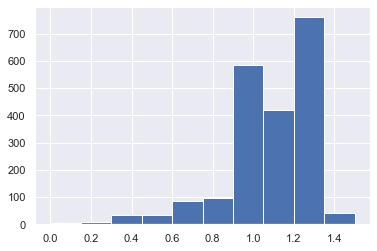

In [658]:


plt.hist(temp.rate,bins=10)
plt.show()

#### <span style='color:red;'>  from `1.2` to `1.4` most frequent rating</span>

### <span style='color:blue;'> What is the Most frequent Dog stage</span>

In [659]:
temp.stage.value_counts()  # to explore outliers und unknown 


Unknown         1750
pupper          210 
doggo           67  
puppo           23  
doggopupper     11  
floofer         7   
doggopuppo      1   
doggofloofer    1   
Name: stage, dtype: int64

In [660]:
temp2=temp.query('stage!="Unknown"')

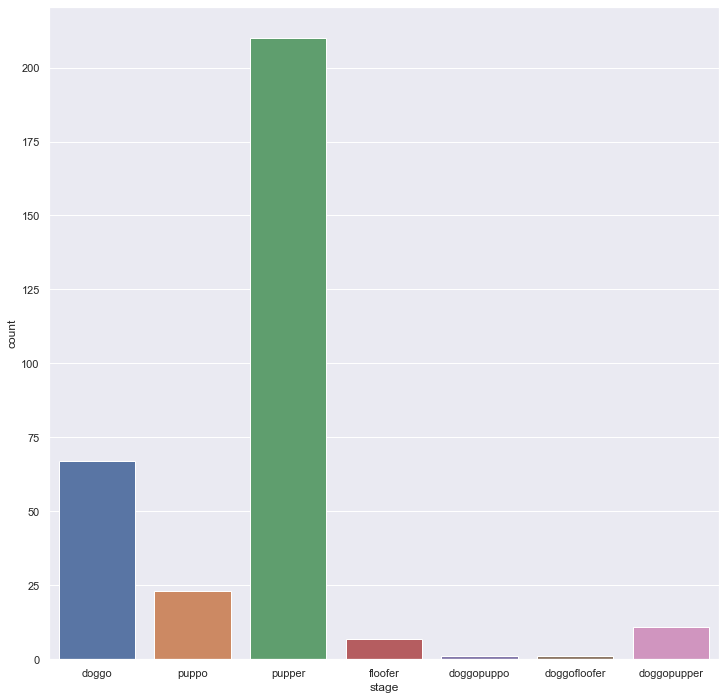

In [661]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.set(style="darkgrid")
ax = sns.countplot(x="stage", data=temp2)

## <span style='color:red;'>`pupper` is most frequnet Dog stage </span>

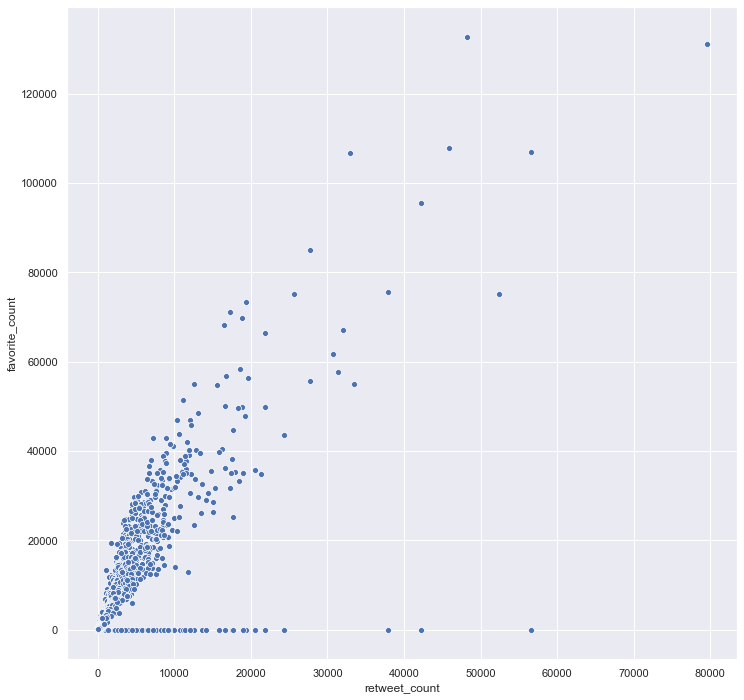

In [662]:
fig, ax = plt.subplots(figsize=(12, 12))
ax=sns.scatterplot(x = "retweet_count", y = "favorite_count", data=twitter_archive_master)


## <span style='color:red;'> tweets without any like could retweets alot</span>

## <span style='color:red;'> almost The more likes increase  The more reweets count increase </span>